# Einführung in die Programmierung für Studierende der Physik
# (Introduction to Programming for Physicists)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Sommersemester 2022)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 01.04.2022

## Numerisches Lösen von Differentialgleichungen (das Anfangswertproblem)

Zunächst wird das Python Modul "sympy" eingebunden, das ein Computer-Algebra-System für Python bereitstellt und eine Vielzahl an symbolischen Berechnungen im Bereich der Mathematik und Physik relativ einfach möglich macht. Falls Sie das "sympy" Modul das erste Mal verwenden, müssen Sie es zunächst in Ihrer Python 3 Umgebung installieren (z.B. in einem Linux Terminal mit "pip3 install sympy").

In [1]:
from sympy import *
init_printing()

Wir betrachten in diesem Jupyter Notebook das numerische Lösen einer Differentialgleichung (DGL) erster Ordnung der Form 

$$
\begin{equation}
\dot{y}(t) = \frac{d y(t)}{dt} = f(t,y(t)) \quad, \, \hbox{mit:} \,\, a \leq t \leq b \, , \,\, y(a)=\alpha \quad.
\end{equation}
$$


Die Funktion $f(t,y(t))$ bestimmt die DGL und somit das Verhalten der gesuchten Funktion $y(t)$. Es wird hierbei vorausgesetzt, dass $f(t,y(t))$ auf einer Teilmenge ${\cal D}=\{ (t,y) | a \leq t \leq b \, , \,\,  -\infty \leq y \leq \infty \}$ kontinuierlich definiert ist. Weiter wird angenommen, das so definierte Anfangswertproblem "well-posed" ist und eine eindeutige Lösung $y(t)$ existiert ("well-posed" bedeutet hier, dass die Differentialgleichung eine Struktur hat, bei der kleine Störungen im Anfangszustand nicht exponentiell anwachsen).

### Beispiel: Analytische Lösung
Wir betrachten im Folgenden die DGL:

$$
\begin{equation}
\frac{d y(t)}{dt} = f(t,y(t)) = y(t)-t^2 +1 \quad, \, \hbox{mit:} \,\, 0 \leq t \leq 2 \, , \,\, y(0)=\alpha = 0.5 \quad.
\end{equation}
$$

Zunächst definieren wir uns die DGL als sympy-Gleichung

In [2]:
t= symbols('t',real=True)
y = Function('y')(t)
DGL = Eq(y.diff(t), y-t**2 +1)
DGL

und versuchen mittels des Befehls "dsolve()" eine allgemeine analytische Lösung zu finden: 

In [3]:
dsolve(DGL)

Die Konstante $C_1$ ist durch die oben angegebene Anfangsbedingung ($y(0)= \alpha$) bestimmt. Einarbeiten dieser Anfangsbedingung:

In [4]:
alpha= symbols('alpha')
y_0 = alpha
dsolve(DGL,ics={y.subs(t,0):y_0})

Es wird somit eine allgemeine analytische Lösung gefunden, sodass wir die spezielle Anfangsbedingung ($y(0)= 0.5$, $\alpha=0.5$) einarbeiten können um den noch unbestimmten Parameter $C_1$ bzw. $\alpha$ festzulegen.

In [5]:
y_0 = 0.5
Loes_DGL = dsolve(DGL,ics={y.subs(t,0):y_0})
Loes_DGL

Wir stellen uns die berechnete analytische Lösung der DGL dar:

In [7]:
plot(Loes_DGL.rhs,xlim=(0,2),ylim=(0,6),ylabel="y(t)");

### Beispiel: Numerische Lösung 
Nicht jede DGL lässt sich analytisch lösen und falls der Befehl "dsolve()" keine sinnvollen Resultate liefert, muss man die zeitliche Entwicklung der Funktion $y(t)$ numerisch berechnen. Um zu verdeutlichen, wie eine solche numerische Lösung erzeugt wird, benutzen wir die DGL aus dem vorigen Beispiel (obwohl man hier eine analytische Lösung findet). Die numerische Lösung berechnen wir uns im Folgenden mittels der Methode "integrate.odeint()", die in dem Python-Modul "scipy" definiert ist. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
from scipy import integrate

Wir definieren uns die DGL als eine Funktion

In [9]:
def DGL_num(y,t):
    dydt = y-t**2 +1
    return dydt

und lösen das Anfangswertproblem im Bereich $t \in [0,2]$ unter Verwendung von $N=10$ zeitlichen Gitterpunkten (mesh points).

In [10]:
N=10
tval = np.linspace(0, 2, N+1)
Loes_DGL_num = integrate.odeint(DGL_num, y_0, tval)

Wir stellen uns die numerische Lösung grafisch dar:

In [11]:
params = {
    'figure.figsize'    : [8,5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

In [12]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm y(t)$")
plt.plot(tval, Loes_DGL_num,c="blue");

Wir vergleichen diese numerische Lösung mit den Resultaten des C++ Programms DGL_1.cpp. Bei der Erzeugung der Daten wurden ebenfalls nur 10 Gitterpunkte verwendet.

In [13]:
data = np.genfromtxt("./DGL_1.dat")

In [14]:
import matplotlib.gridspec as gridspec
# Bildabmessungen usw.
params = {
    'figure.figsize'    : [14,10],
    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

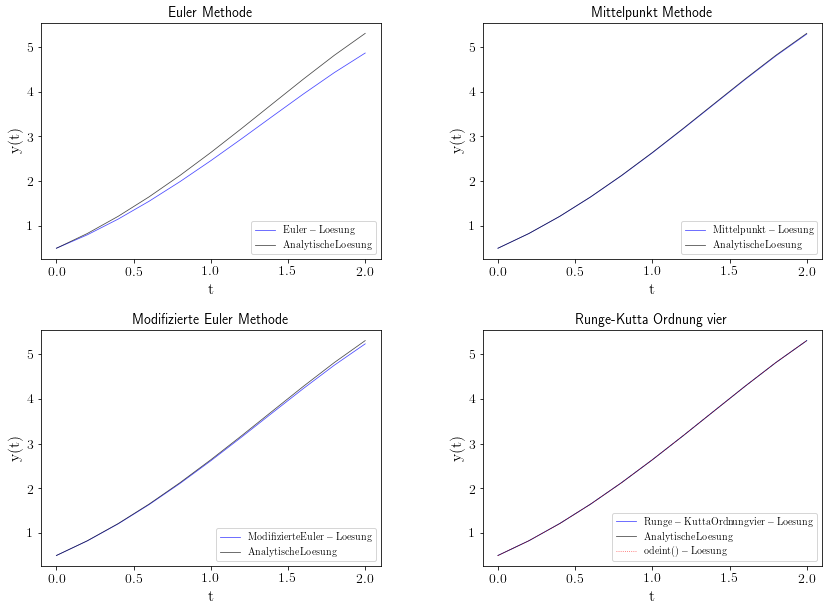

In [15]:
fig = plt.figure()                                                        # Hauptbild
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)  # Anordnung der vier Unterbilder
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title(r'Euler Methode')                      # Titel der Abbildung in ax1
ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm y(t)$")
ax2.set_title(r'Mittelpunkt Methode')                # Titel der Abbildung in ax2 
ax2.set_xlabel(r"$\rm t$")
ax2.set_ylabel(r"$\rm y(t)$")
ax3.set_title(r'Modifizierte Euler Methode')         # Titel der Abbildung in ax3  
ax3.set_xlabel(r"$\rm t$")
ax3.set_ylabel(r"$\rm y(t)$")
ax4.set_title(r'Runge-Kutta Ordnung vier')           # Titel der Abbildung in ax4  
ax4.set_xlabel(r"$\rm t$")
ax4.set_ylabel(r"$\rm y(t)$")

l_width=0.8                                          # Festlegung der Plot-Liniendicke  
alp=0.7                                              # Festlegung der Transparenz der Kurven

ax1.plot(data[:,1],data[:,2], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Euler-Loesung$')
ax1.plot(data[:,1],data[:,6], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Analytische \, Loesung$') 

ax2.plot(data[:,1],data[:,3], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Mittelpunkt-Loesung$')
ax2.plot(data[:,1],data[:,6], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Analytische \, Loesung$')

ax3.plot(data[:,1],data[:,4], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Modifizierte Euler-Loesung$')
ax3.plot(data[:,1],data[:,6], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Analytische \, Loesung$')

ax4.plot(data[:,1],data[:,5], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Runge-Kutta Ordnung vier-Loesung$')
ax4.plot(data[:,1],data[:,6], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Analytische \, Loesung$')
ax4.plot(tval, Loes_DGL_num, color="red", linewidth=l_width, linestyle=':', alpha=alp, label=r'$\rm odeint()-Loesung$') 

ax1.legend(frameon=True, loc="lower right",fontsize=10)  # Anordnung der Legende auf ax1
ax2.legend(frameon=True, loc="lower right",fontsize=10)  # Anordnung der Legende auf ax2
ax3.legend(frameon=True, loc="lower right",fontsize=10)  # Anordnung der Legende auf ax3
ax4.legend(frameon=True, loc="lower right",fontsize=10); # Anordnung der Legende auf ax4

Wir stellen uns den Fehler $\Delta y$ der simulierten Datenpunkte zur analytischen Lösung dar ($\Delta y = y_{analytisch}-y$):

In [16]:
Loes_DGL_lam = lambdify(t, Loes_DGL.rhs)

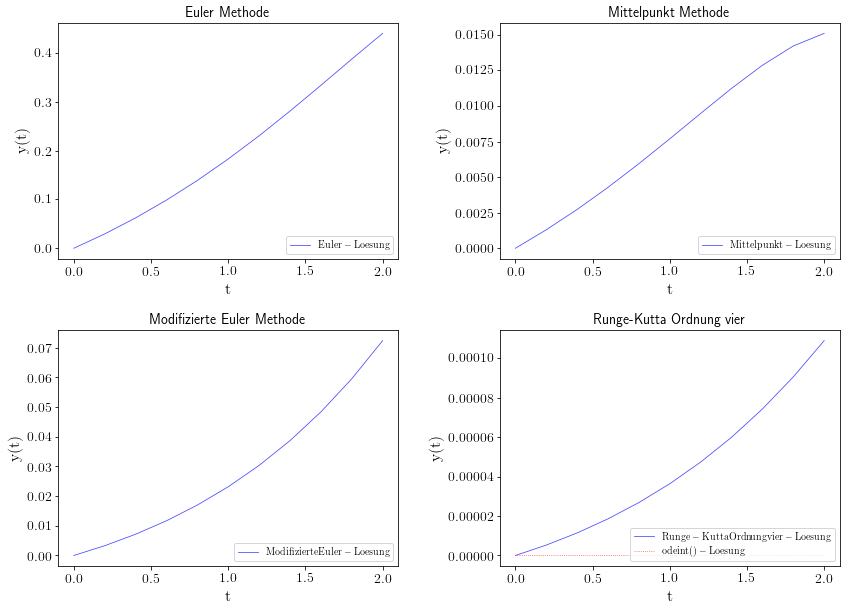

In [17]:
fig = plt.figure()                                                        # Hauptbild
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)  # Anordnung der vier Unterbilder
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title(r'Euler Methode')                      # Titel der Abbildung in ax1
ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm y(t)$")
ax2.set_title(r'Mittelpunkt Methode')                # Titel der Abbildung in ax2 
ax2.set_xlabel(r"$\rm t$")
ax2.set_ylabel(r"$\rm y(t)$")
ax3.set_title(r'Modifizierte Euler Methode')         # Titel der Abbildung in ax3  
ax3.set_xlabel(r"$\rm t$")
ax3.set_ylabel(r"$\rm y(t)$")
ax4.set_title(r'Runge-Kutta Ordnung vier')           # Titel der Abbildung in ax4  
ax4.set_xlabel(r"$\rm t$")
ax4.set_ylabel(r"$\rm y(t)$")

l_width=0.8                                          # Festlegung der Plot-Liniendicke  
alp=0.7                                              # Festlegung der Transparenz der Kurven


ax1.plot(data[:,1],data[:,6]-data[:,2], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Euler-Loesung$')
ax2.plot(data[:,1],data[:,6]-data[:,3], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Mittelpunkt-Loesung$')
ax3.plot(data[:,1],data[:,6]-data[:,4], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Modifizierte Euler-Loesung$')
ax4.plot(data[:,1],data[:,6]-data[:,5], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Runge-Kutta Ordnung vier-Loesung$')
ax4.plot(tval, data[:,6]-Loes_DGL_lam(tval), color="red", linewidth=l_width, linestyle=':', alpha=alp, label=r'$\rm odeint()-Loesung$') 

ax1.legend(frameon=True, loc="lower right",fontsize=10)  # Anordnung der Legende auf ax1
ax2.legend(frameon=True, loc="lower right",fontsize=10)  # Anordnung der Legende auf ax2
ax3.legend(frameon=True, loc="lower right",fontsize=10)  # Anordnung der Legende auf ax3
ax4.legend(frameon=True, loc="lower right",fontsize=10); # Anordnung der Legende auf ax4

Wir erhöhen nun die Anzahl der Gitterpunkte ($N=10000$) und betrachten uns wieder den Fehler $\Delta y$.

In [18]:
N=10000
tval = np.linspace(0, 2, N+1)
Loes_DGL_num = integrate.odeint(DGL_num, y_0, tval)

In [19]:
data = np.genfromtxt("./DGL_1a.dat")

In [20]:
fig = plt.figure()                                                        # Hauptbild
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)  # Anordnung der vier Unterbilder
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title(r'Euler Methode')                      # Titel der Abbildung in ax1
ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm \Delta y$")
ax2.set_title(r'Mittelpunkt Methode')                # Titel der Abbildung in ax2 
ax2.set_xlabel(r"$\rm t$")
ax2.set_ylabel(r"$\rm \Delta y$")
ax3.set_title(r'Modifizierte Euler Methode')         # Titel der Abbildung in ax3  
ax3.set_xlabel(r"$\rm t$")
ax3.set_ylabel(r"$\rm \Delta y$")
ax4.set_title(r'Runge-Kutta Ordnung vier')           # Titel der Abbildung in ax4  
ax4.set_xlabel(r"$\rm t$")
ax4.set_ylabel(r"$\rm \Delta y$")

l_width=0.8                                          # Festlegung der Plot-Liniendicke  
alp=0.7                                              # Festlegung der Transparenz der Kurven

ax1.plot(data[:,1],data[:,6]-data[:,2], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Euler-Loesung$')
ax2.plot(data[:,1],data[:,6]-data[:,3], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Mittelpunkt-Loesung$')
ax3.plot(data[:,1],data[:,6]-data[:,4], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Modifizierte Euler-Loesung$')
ax4.plot(data[:,1],data[:,6]-data[:,5], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm Runge-Kutta Ordnung vier-Loesung$')
ax4.plot(tval, data[:,6]-Loes_DGL_lam(tval), color="red", linewidth=l_width, linestyle=':', alpha=alp, label=r'$\rm odeint()-Loesung$') 

ax1.legend(frameon=True, loc="lower right",fontsize=10)  # Anordnung der Legende auf ax1
ax2.legend(frameon=True, loc="lower right",fontsize=10)  # Anordnung der Legende auf ax2
ax3.legend(frameon=True, loc="lower right",fontsize=10)  # Anordnung der Legende auf ax3
ax4.legend(frameon=True, loc="lower right",fontsize=10); # Anordnung der Legende auf ax4